[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]
[[ 0.67676923  0.0597386 ]
 [-1.07121393  0.25724006]
 [ 0.72791236 -0.16866994]]


Text(0.5, 1.0, 'PCA Lösung anhand der Komponenten')

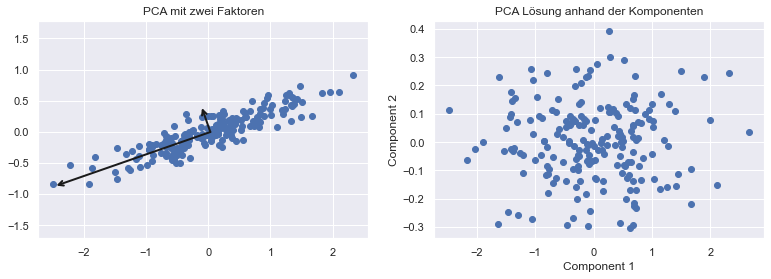

In [2]:
# X Principal Component Analysis (PCA)

# Die PCA ist ein unsupervized Learning Algorithm (Ähnlich wie Clustering-Verfahren, z.B. k-means) >> Dabei ist es das Ziel
# Zusammenhänge der Daten zu erschließen, ohne bereits auf vorab gefertigte Label zurückzugreifen 
# ... Genauer ist die PCA ein Dimensionsreduzierendes Verfahren, dass überprüft, ob die Varianz der Daten auf einen gemeinsamen
#     zugrundeliegenden Faktor zurückgeführt werden kann (e.g. Skalenbildung)
# ... Das Verfahren kann außerdem zum Noisefiltering und der Featureextraction eingesetzt werden

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Beispiel zur Funktionsweise
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T

plt.figure(figsize = (13, 4))
plt.subplot(1, 2, 1) 
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.title('PCA mit zwei Faktoren')

# Es wird deutlich, dass die Daten in einem nahezu eindeutigen linearen Verhältnis stehen
# >> Im Gegensatz zur Regression, die diesen Zusammenhang vorhersagen könnte, geht es bei der PCA jedoch darum die Beziehung
#    zwischen x und y zu verstehen, um diese mithilfe einer Reihe von principal axes zu erklären (die späteren Faktoren)

# X Die PCA
from sklearn.decomposition import PCA

# Modell-Objekt instanziieren
pca = PCA(n_components=2) # Es wird eine Faktorenlösung mit 2 Komponenten berechnet
# Modell berechnen
pca.fit(X)

# Kennwerte betrachten
print(pca.components_) # Richtung der Vektoren durch 2 Werte bestimmt
print(pca.explained_variance_) # der zweite Faktor erklärt wenige eigene Varianz (länge der Vektoren)


# Um zu verstehen, was diese Werte bedeuten, hilft es diese als Vektoren in den Daten zu visualisieren (components=Richtung)
# explained_variance = squared Länge der Vektoren

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle= '->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Vektoren plotten
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

# Factorlösung bestimmen
Xnew = pca.transform(X)
print(Xnew[:3,:]) # zeigt die neuen Werte für Komponente 1 und Komponente 2

plt.subplot(1, 2, 2)
plt.scatter(Xnew[:,0], Xnew[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('PCA Lösung anhand der Komponenten')
# Visualisiert neue Werte

Original Shape: (200, 2)
Transformed Shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.0060642308539953)

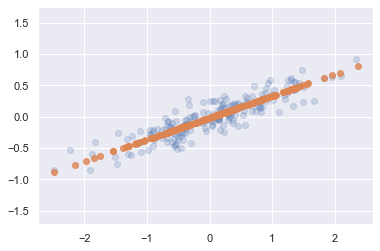

In [65]:
# X PCA zur Dimensionsreduzierung
# Ziel dabei ist es die Daten mit einer minimalen Anzahl von übergeordneten Faktoren/ Dimensionen zu erklären,
# und trotzdem so viel wie möglich Varianz zu erklären
# >> Dabei wird automatisch etwas Varianz der ursprünglichen Items verloren gehen... (da die einzige Lösung, in der diese
#    vollständig erhalten werden kann, die ist, in der alle Items enthalten sind)
pca = PCA(n_components=1)
pca.fit(X)

X_pca = pca.transform(X)
print("Original Shape:", X.shape)
print("Transformed Shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')

# Die orangen Punkte entsprechen der Projektion durch die PCA-Lösung mit einem Faktor
# >> Dadurch wird deutlich, dass durch die Messung mit einem einzelnen Faktor, etwas Varianz der Items verloren geht 
#    (ungefähr der Teil in blau, der von der Linie abweicht)

(1797, 64)
(1797, 2)


C:\Users\Manue\AppData\Local\Temp\ipykernel_20324\3412009491.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


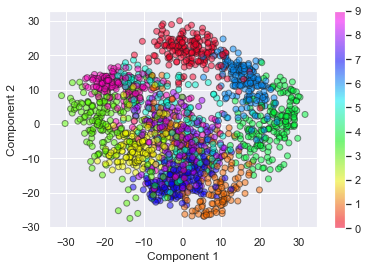

In [99]:
# PCA für visualisierung: Handgeschriebene Zahlen
from sklearn.datasets import load_digits

# Datensatz einlesen
digits = load_digits()
print(digits.data.shape)

# Zur Erinnerung: Der Datensatz besteht aus 8X8 Pixel-Bildern, die in eine Liste von 64 Werten mit dem Grad der Färbung im
# Pixel umgewandelt wurde.

# Um interpretierbarere Erkenntnisse über den Datensatz zu gewinnen können diese 64 Dimensionen reduziert werden
pca = PCA(n_components=2) # Reduzieren auf 2 Dimensionen
projected = pca.fit_transform(digits.data)

print(projected.shape)

plt.scatter(projected[:,0], projected[:,1],
           c=digits.target, cmap="gist_rainbow", edgecolor='k', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.colorbar()

Anzahl der Komponenten gemäß Kaiser-Kriterium: 47
Anzahl der Komponente, um 90% der Varianz zu erklären: 20
Anzahl der Komponente, um 75% der Varianz zu erklären: 10


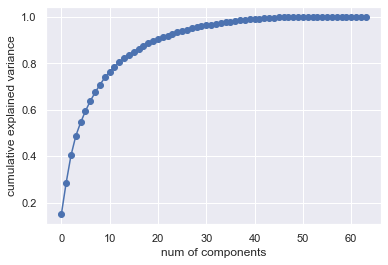

In [138]:
# Was bedeuten die Dimensionen nun?

# ... anstelle einer Bildgenierung auf pixbelbasis, bei der die Summe aus insgesamt 64 Pixeln, das Orinalbild ergibt
#     x = x1(pixel1) + x2(pixel2) ... x64(pixel 64)
#     (aneinanderreihung der Pixel erzeugt das Bild)
# ... wird das Bild durch eine reduzierte Menge von Basisfunktionen (Faktoren) erklärt, die die Inform. in den Daten zusammenfassen
#     x = mean + x1 (basis1) + x2(basis2) + ... x8(basis8)
#     (das Übereinanderlegen der Componenten zeichnet das Bild nach)
#  >> so lässt sich das ursprüngliche Bild von 64 Pixeln bereits sehr gut mit der Summe von 8-Fakoren nachbilden


# X Anzahl der Componente festlegen
# Ellbow-Kriterium
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
# mit ca. 8 Faktoren kann 75% der Varianz erhalten werden...
# >> Das Ellbow-Kriterium legt fest, dass dort ein eindeutiger 'Knick' erkannt werden sollte, für die optimale Faktorenlösung


# X Kaiser-Kriterium
eigenvalues = pca.explained_variance_

# Wähle nur Komponenten mit Eigenwert > 1
optimal_components_kaiser = sum(eigenvalue > 1 for eigenvalue in eigenvalues)
print("Anzahl der Komponenten gemäß Kaiser-Kriterium:", optimal_components_kaiser)


# X Schwellenwerte für erklärte Varianz bestimmen
# Laut Chat GPT idR bei 90% / 95%

# Lösung für 90%
print("Anzahl der Komponente, um 90% der Varianz zu erhalten:", sum(np.cumsum(pca.explained_variance_ratio_) <.9))

# Lösung für 75%
print("Anzahl der Komponente, um 75% der Varianz zu erhalten:", sum(np.cumsum(pca.explained_variance_ratio_) <.75))


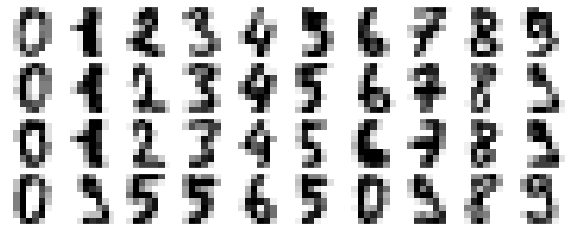

In [143]:
# X PCA zum Filtern von zufälliger Varianz (noise)
# Die Idee ist, dass mit einer gut gewählten Zahl von Hauptkomponenten, die Hauptkomponenten von der zufälligen Varianz
# unberührt bleiben >> Heißt in der Faktorlösung bleibt (idealerweise) die Information ohne den Noise erhalten

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), # wandelt die daten, die in einer Liste angegeben sind wieder in einen 8X8 array um, der visualisiert werden kann
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
plot_digits(digits.data)

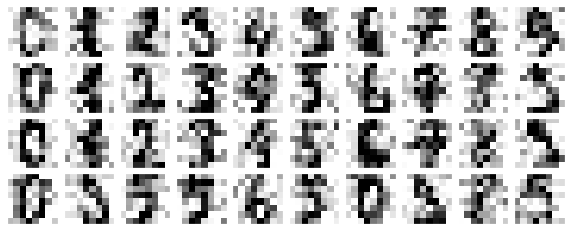

In [145]:
# X Die Daten mit Noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

# Zeigt die Daten mit etwas zufälligem noise

Lösung enthält 12 Komponente


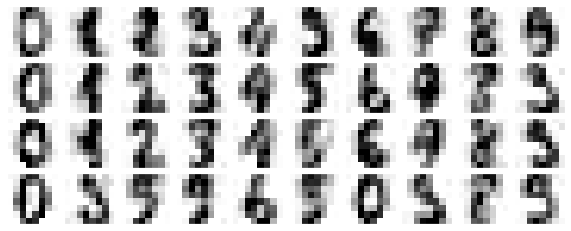

In [154]:
# X Versuch der Noise reduzierung mit PCA

pca = PCA(0.5).fit(noisy) # PCA erhält 50% der ursprünglichen Varianz
print("Lösung enthält", pca.n_components_, "Komponente")

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Diese noise-filtering Technik macht PCA zu einer sehr mächtigen ANwendung für feature selection
# >> Statt einen Klassifizierer an hochdimensionalen Daten trainineren zu lassen, ist es oft besser den Classifier an einem
#    durch die PCA dimensionsreduzierten Datensatz zu trainieren, in dem Zufällige Varianz herausgefiltert wurde

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
[ 0.01708352  0.01623677  0.01622015 ... -0.03474267 -0.03416988
 -0.03298329]


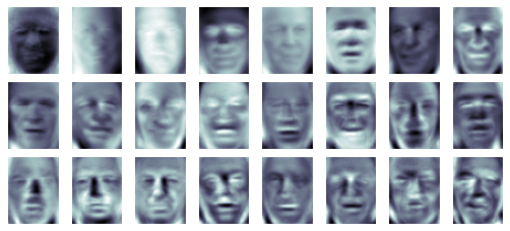

In [5]:
# Beispiel: Eigenfaces

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names) # Bilder von 8 Personen insgesamt
print(faces.images.shape) # 1348 Bilder mit 62X47 Pixeln

# Principal Axes des Datensatz herausfinden
# ... Dafür wird das eine randomisierte PCA erstellt, mit dem die ersten Komponenten viel schneller berechnet werden können 
#     als mit der Standard-PCA, dazu wird svd_solver auf 'randomized' gesetzt

# Modell-Objekt importieren und berechnen
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

# Visualisieren der Eigenfaces
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
# Dies verdeutlicht wie der Algorithmus funktoniert ... 
# Während der Algorithmus zunächst eher Lichtverhältnisse bestimmt, werden später eher konkrete Gesichtszüge, wie Nasen, 
# Augen oder Mundform ausgearbeitet


# Die Zusammensetzung der Komponenten einer Faktorenlösung ist in .components_ angegeben
print(pca.components_[1])
# ... Die Ausprägung auf diesem Faktor ergibt sich aus der Summe der Werte für jeden Pixel mulitpliziert mit dem in .components_
#     angegebenen Faktorgewicht
# ... interessanterweise bilden die Faktorgewichte bereits blueprits von Pixelanordnungen (siehe Visualisierung)
#     die als Eigenfaces bezeichnet werden

Erhaltene Varianz: 0.946 %


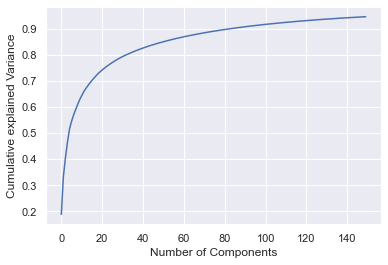

In [181]:
# Überprüfen, wie viel Varianz erhalten bleibt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel('Cumulative explained Variance')
print("Erhaltene Varianz:", round(np.cumsum(pca.explained_variance_ratio_)[149], 3), "%")

Text(0, 0.5, '150-dim\nInput')

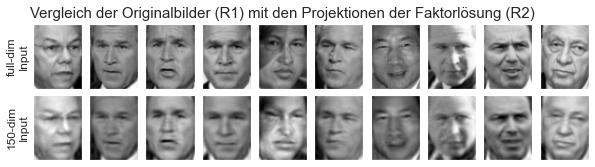

In [205]:
# Komponente berechnen und projezierte Bilder visualisieren
pca = PCA(150, svd_solver='randomized').fit(faces.data)

# Daten in Faktorlösung umwandeln
components = pca.transform(faces.data)
# Faktorlösung wieder in Daten aufschlüsseln
projected = pca.inverse_transform(components)

# Ergebnisse Visualisieren
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 4].set_title("Vergleich der Originalbilder (R1) mit den Projektionen der Faktorlösung (R2)", size=15)
ax[0, 0].set_ylabel('full-dim\nInput')
ax[1, 0].set_ylabel('150-dim\nInput')

In [ ]:
# Vorteile der PCA:
# - Aufgrund der großen Flexibilität ist die PCA ein guter Startpunkt für die Auseinandersetzung mit Daten mit vielen 
#   Dimensionen (z.B. um die Daten interpretierbarer und handhabbarer für Klassifizierungsalgorithmen zu machen)

# ! Schwäche der PCA
# - Anfälligkeit für Ausreißer > weshalb eine Reihe von robusteren Verfahren, wie die randomized PCA oder sparse PCA
#   (letzteres enthält einen regularization Term, um sparse Components zu gewährleisten) in sklearn zur Verfügung stehen
# - Perfomt nicht so gut bei nicht-linearen Beziehungen von Daten (siehe manifold Learning)